In [1]:
import numpy as np
import networkx as nx
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def HRmodelfunc(U, t, I, r):
    #print(t)
    x, y, z = U
    dxdt = y + 3*(x ** 2) - (x ** 3) - z + I
    dydt = 1 - 5 * (x ** 2) - y
    dzdt = r * (4 * (x + 8/5) - z)
    return np.array([dxdt, dydt, dzdt])

In [12]:
def rungekutta4(f, y0, t, transient_t = 0.0, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    transient_t_indice = None
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
        if transient_t_indice is None and t[i] == transient_t:
            transient_t_indice = i
    return t[transient_t_indice:], y[transient_t_indice:]

time = np.arange(0, 1500.005, 0.005)
time, solution = rungekutta4(HRmodelfunc, [-1.0, 2.0, 0.5], time, 200.0, args=(3.25, 0.003))



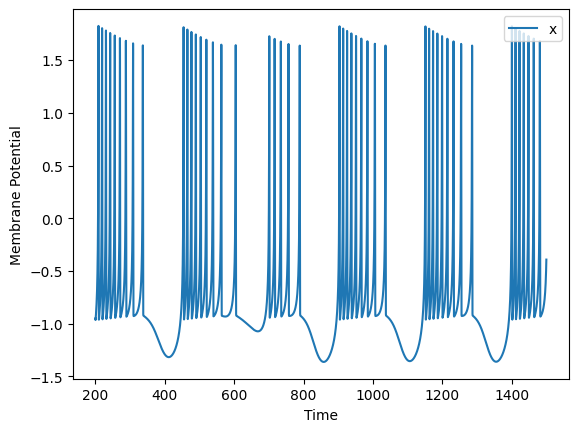

In [13]:
solution = np.transpose(solution)

plt.plot(time, solution[0], label = 'x')
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Membrane Potential")
plt.show()